## PROYECTO 1 - FÍSICA

pip install scipy

In [10]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

In [11]:
def newton(t, Y, q, m, B):
    """Computes the derivative of the state vector y according to the equation of motion:
    Y is the state vector (x, y, z, u, v, w) === (position, velocity).
    returns dY/dt.
    """
    x, y, z = Y[0], Y[1], Y[2]
    u, v, w = Y[3], Y[4], Y[5]
    
    alpha = q / m * B
    return np.array([u, v, w, 0, alpha * w, -alpha * v])

In [12]:
r = ode(newton).set_integrator('dopri5')

In [13]:
t0 = 0
x0 = np.array([0, 0, 0])
v0 = np.array([1, 1, 0])
initial_conditions = np.concatenate((x0, v0))

In [14]:
r.set_initial_value(initial_conditions, t0).set_f_params(1.0, 1.0, 1.0)

positions = []
t1 = 50
dt = 0.05
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    positions.append(r.y[:3]) # keeping only position, not velocity

positions = np.array(positions)

In [15]:
%matplotlib inline

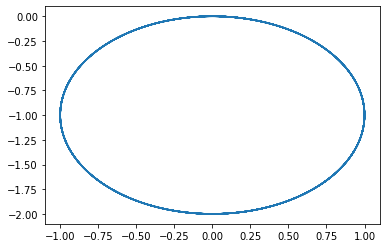

In [16]:
plt.plot(positions[:, 1], positions[:, 2])

In [17]:
import matplotlib as mpl

Text(60, 0, 'B field')

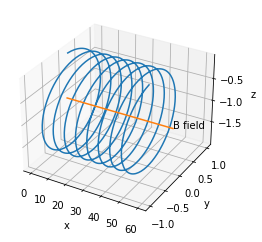

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(positions[:, 0], positions[:, 1], positions[:, 2])

B1 = np.array([x0[0], x0[1], -1])
B2 = np.array([60, 0, 0])
B_axis = np.vstack((B1, B1 + B2))
ax.plot3D(B_axis[:, 0], 
         B_axis[:, 1],
         B_axis[:, 2])
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax.text3D((B1 + B2)[0], (B1 + B2)[1], (B1 + B2)[2], "B field")

In [19]:
from tempfile import NamedTemporaryFile
import base64 
from matplotlib import animation
VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        f = NamedTemporaryFile(suffix='.mp4', delete=False)
        anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
        f.flush()
        video = open(f.name, "rb").read()
        f.close()
        anim._encoded_video = base64.b64encode(video).decode('utf-8')
    
    return VIDEO_TAG.format(anim._encoded_video)

In [23]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [24]:
FRAMES = 50
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
# animation function.  This is called sequentially
def animate(i):
    current_index = int(positions.shape[0] / FRAMES * i)
    ax.cla()
    ax.plot3D(positions[:current_index, 0], 
              positions[:current_index, 1], 
              positions[:current_index, 2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
# call the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=100)

# call our new function to display the animation
display_animation(anim)

MovieWriter ffmpeg unavailable; using Pillow instead.


TypeError: __init__() got an unexpected keyword argument 'extra_args'